In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import SearchIO
import csv
import sqlite3
import time
from multiprocessing import Pool, cpu_count
import sys
from calc_icity_ import *
import ast
from collections import defaultdict

In [68]:
tnpBs_list = []
infile_tnpBs = "tnpBs_in_testdb.p100.txt"
with open(infile_tnpBs, "r") as infile:
    lines = infile.readlines()
    for line in lines:
        p100 = line.split('\n')[0]
        tnpBs_list.append(p100)
tnpBs_set = set(tnpBs_list)
len(tnpBs_list)

78873

In [86]:
tnpB_10_target_annot_df = pd.read_csv("tnpB_targetgenes_pfam.csv").iloc[:,1:]

In [87]:
high_icity_tnpBs_ls = []
for baitp100s_str in tnpB_10_target_annot_df["baitp100s"]:
    baitp100s_ls = ast.literal_eval(baitp100s_str)
    high_icity_tnpBs_ls += baitp100s_ls
high_icity_tnpBs = list(set(high_icity_tnpBs_ls))
high_icity_tnpBs_set = set(high_icity_tnpBs_ls)
len(high_icity_tnpBs)

24707

## get representative tnpBs (p60s) to align

In [88]:
def get_prot_sequence(pid):
    con=sqlite3.connect("80kprotein_stats.db")
    cur = con.cursor()
    cmd = "SELECT sequence FROM proteins WHERE pid = '%s'" % pid 
    #print(cmd)
    cur.execute(cmd)
    return str(cur.fetchone()[0])
    con.close()
def get_faas_protidlist(protidlist, outfile_path):
    with open(outfile_path, "w") as outfile:
        for protid in protidlist:
            protseq = get_prot_sequence(protid)
            print(">" + protid, file=outfile)
            print(protseq, file=outfile)
#get_faas_protidlist(tnpBs_list, "INPUT/tnpB_mmseqs_input.faa")

In [89]:
tnpB_p60s_path = "../tnpBs/cluster/OUTPUT/tmp/clu_cluster.tsv"
tnpB_p60_df = pd.read_csv(tnpB_p60s_path, sep = '\t', header = None).rename(columns = {0:"p60",1:'p100'}).drop_duplicates()

In [110]:
tnpB_p60_df_samp500 = tnpB_p60_df.sample(500)
tnpB_p60_list_samp500 = list(set(tnpB_p60_df_samp500['p60']))
tnpB_p60_highicity_list = [p60 for p60 in tnpB_p60_list_samp500 if p60 in high_icity_tnpBs_set]

In [114]:
def get_faas_protidlist(protidlist):
    for protid in protidlist:
        outfile_path = "../tnpBs/representatives/" + protid + ".faa"
        with open(outfile_path, "w") as outfile:
            protseq = get_prot_sequence(protid)
            print(">" + protid, file=outfile)
            print(protseq, file=outfile)
#get_faas_protidlist(tnpB_p60_highicity_list)

(array([ 44., 121., 157., 250., 178., 179., 126.,  77.,  91.,  71.]),
 array([ 47. ,  91.9, 136.8, 181.7, 226.6, 271.5, 316.4, 361.3, 406.2,
        451.1, 496. ]),
 <BarContainer object of 10 artists>)

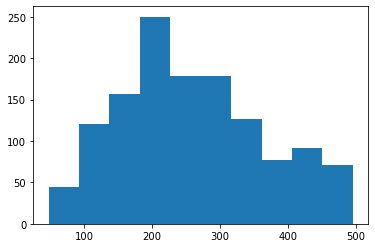

In [122]:
plt.hist(tnpB_10_target_annot_df[tnpB_10_target_annot_df['target_length'] < 500]['target_length'])